In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

In [86]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.shape
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [87]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [88]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [89]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [90]:
#Drop features that are not required to build our model
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [91]:
#Data Cleaning: Handle NA values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [92]:
#since we have 13k data we can drop null as it is in small number
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [93]:
df3.shape

(13246, 5)

In [94]:
#Feature Engineering
#Add new feature(integer) for bhk (Bedrooms Hall Kitchen)
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [95]:
df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\MSI\AppData\Local\Temp\ipykernel_10468\4045510373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [96]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [97]:
df3=df3[df3['bhk'] <= 20]
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [98]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [99]:
df3 = df3.drop(columns=['size'])


In [100]:
df3. head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [101]:
def convert_sqft_to_num(x):
    # If the value contains a range (e.g., "1133 - 1384")
    if '-' in x:
        values = x.split('-')
        return (float(values[0]) + float(values[1])) / 2  # Take the average
    else:
        try:
            return float(x)  # Convert single number directly
        except:
            return None  # Handle unexpected cases

df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [102]:
df3["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13244, dtype: float64

In [103]:
df3.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [104]:
# Drop rows where 'total_sqft' is NaN (invalid values)
df3 = df3.dropna(subset=['total_sqft'])

In [105]:
df4 = df3.copy()
df4.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [106]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [107]:
#Feature Engineering
#Add new feature called price per square feet
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [108]:
len(df4.location.unique())

1297

In [109]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                            533
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        264
Thanisandra                           235
                                     ... 
Kengeri Satellite Town ( BDA SITE)      1
Lakshmipura Vidyaanyapura               1
Malur Hosur Road                        1
Brigade Road                            1
Abshot Layout                           1
Name: count, Length: 1286, dtype: int64

In [110]:
len(location_stats[location_stats<=10])

1046

In [111]:

threshold = 10  # Locations with < 10 occurrences are grouped
df4['location'] = df4['location'].apply(lambda x: 'Other' if location_stats[x] < threshold else x)


In [112]:
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Other                   2731
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
                        ... 
Nagappa Reddy Layout      10
BTM 1st Stage             10
Basapura                  10
Sector 1 HSR Layout       10
Nagadevanahalli           10
Name: count, Length: 255, dtype: int64

In [113]:
len(df4.location.unique())

255

In [114]:
'''  Outlier Removal Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate),
he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft'''

'  Outlier Removal Using Business Logic\nAs a data scientist when you have a conversation with your business manager (who has expertise in real estate),\nhe will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. \nIf you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. \nWe will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft'

In [115]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000


In [116]:
#now removing the outliers (can use this code also)
#df4 = df4[df4.total_sqft / df4.bhk >= 300] 
df6 = df4[~(df4.total_sqft/df4.bhk<300)]
df6.shape

(12456, 6)

In [117]:
#Outlier Removal Using Standard Deviation and Mean
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [118]:
''' Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, 
this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation'''
def remove_outliers(df):
    mean = df.price_per_sqft.mean()
    std_dev = df.price_per_sqft.std()
    lower_bound = mean - (2 * std_dev)  # Keeping only values within 2 standard deviations
    upper_bound = mean + (2 * std_dev)
    
    return df[(df.price_per_sqft >= lower_bound) & (df.price_per_sqft <= upper_bound)]

df7 = remove_outliers(df6)


In [119]:
df7.shape

(11968, 6)

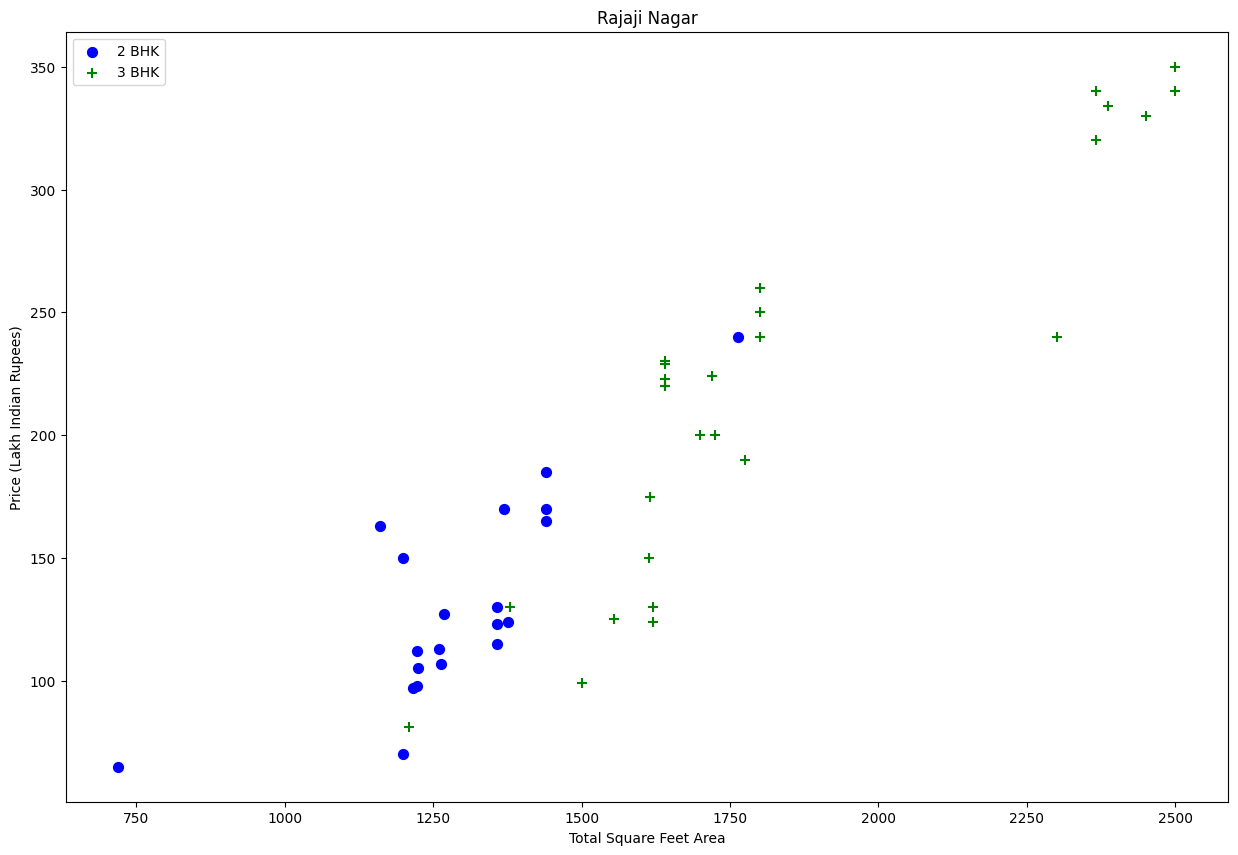

In [120]:
#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

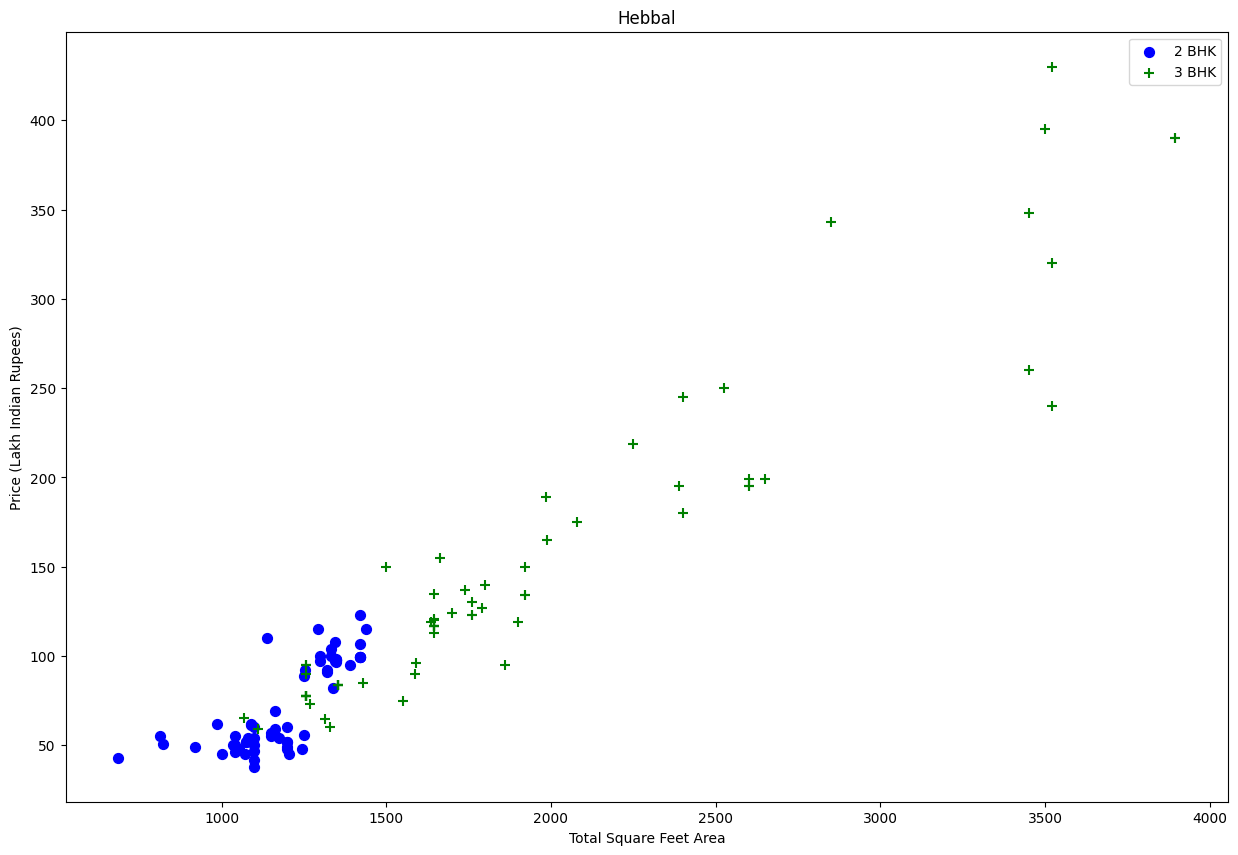

In [121]:
plot_scatter_chart(df7,"Hebbal")

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


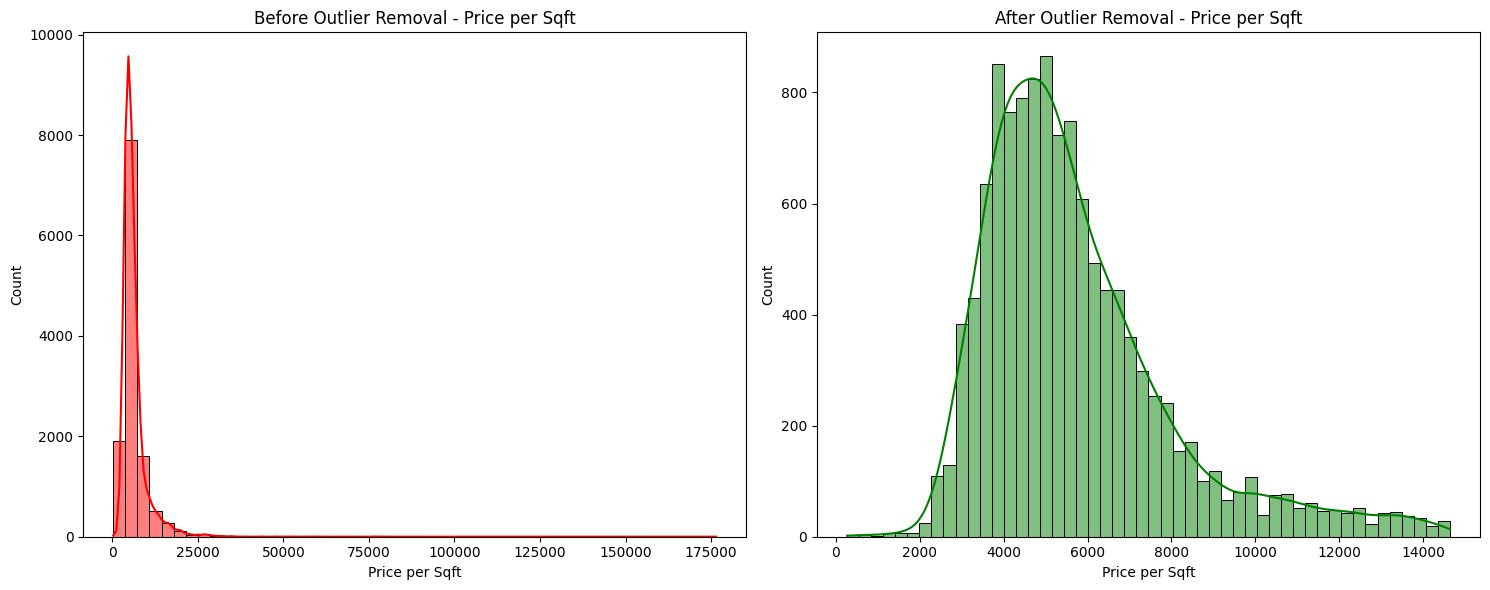

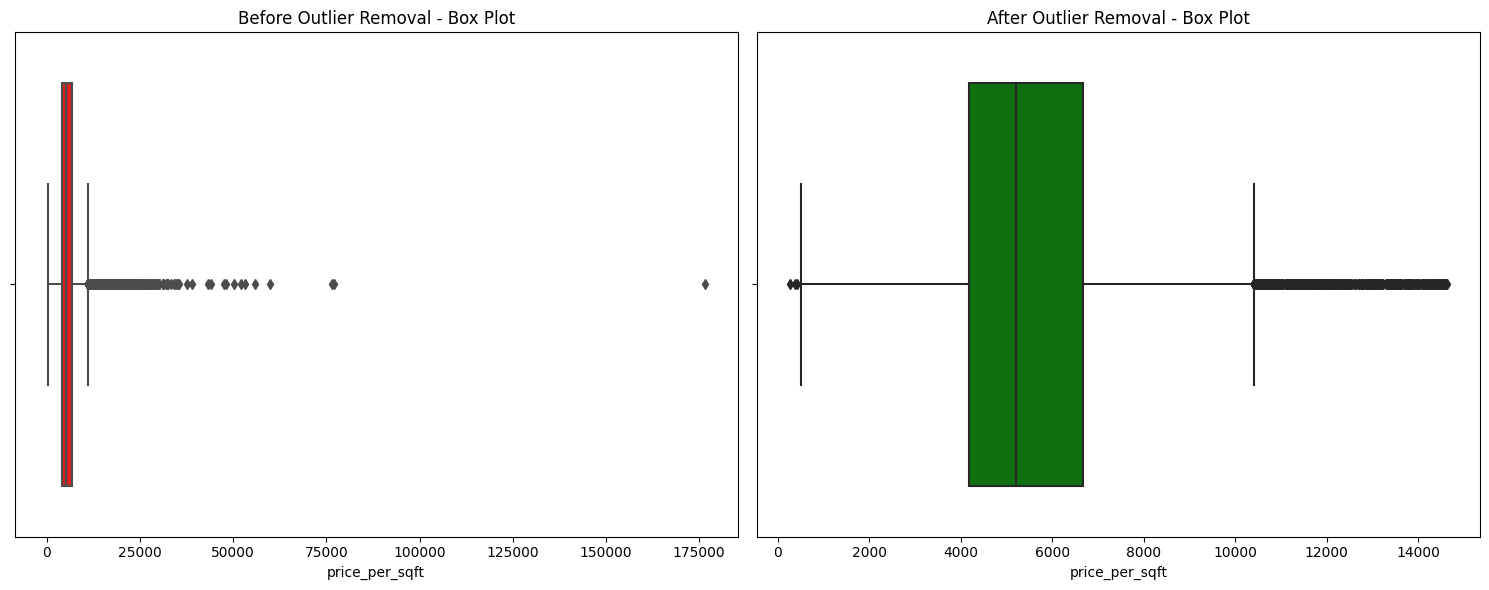

In [122]:

#  HISTOGRAM - BEFORE & AFTER OUTLIER REMOVAL
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df6.price_per_sqft, bins=50, kde=True, color='red')
plt.title("Before Outlier Removal - Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df7.price_per_sqft, bins=50, kde=True, color='green')
plt.title("After Outlier Removal - Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#  BOX PLOT - BEFORE & AFTER OUTLIER REMOVAL
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df6.price_per_sqft, color='red')
plt.title("Before Outlier Removal - Box Plot")

plt.subplot(1, 2, 2)
sns.boxplot(x=df7.price_per_sqft, color='green')
plt.title("After Outlier Removal - Box Plot")

plt.tight_layout()
plt.show()


In [123]:
''' We should also remove properties where for same location, 
the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment 
(with same square ft area). What we will do is for a given location, 
we will build a dictionary of stats per bhk, i.e. '''
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },    
}


{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [124]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(8605, 6)

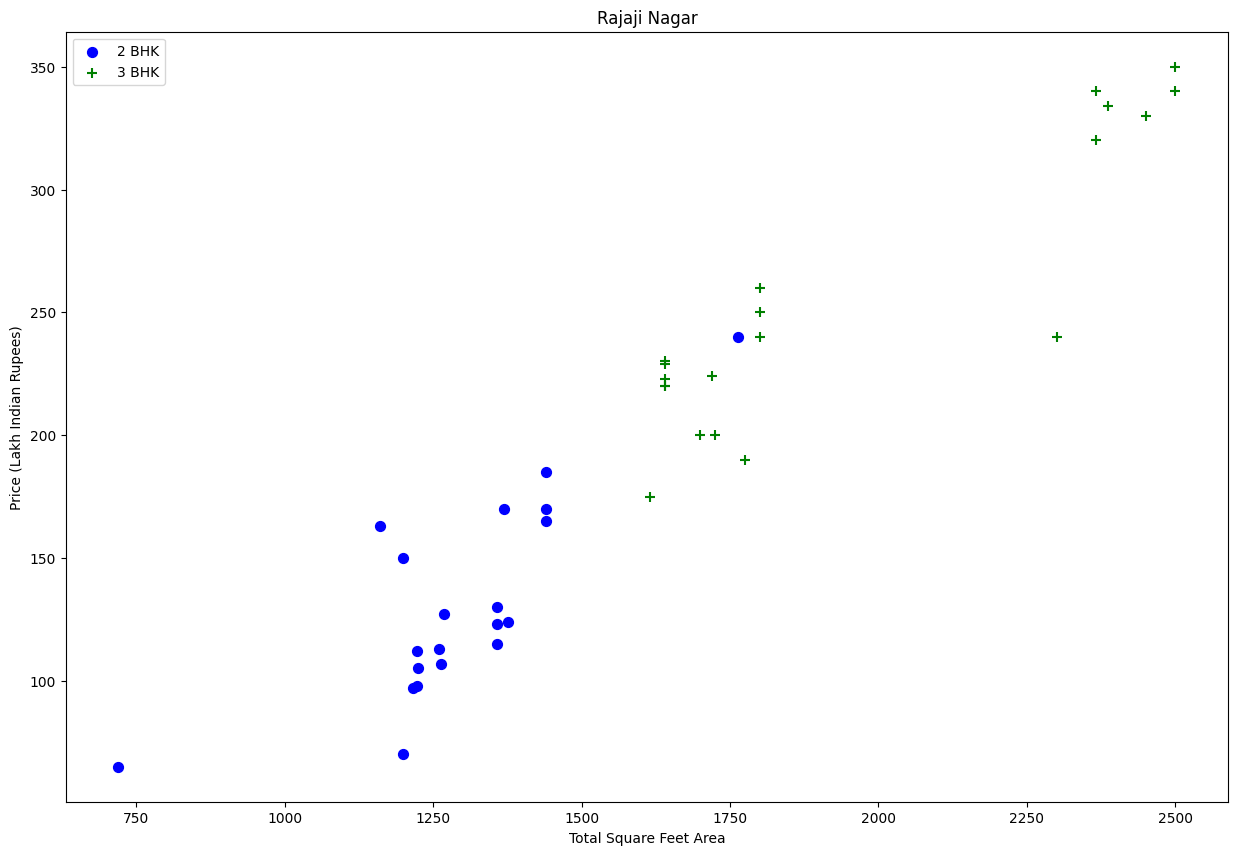

In [125]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

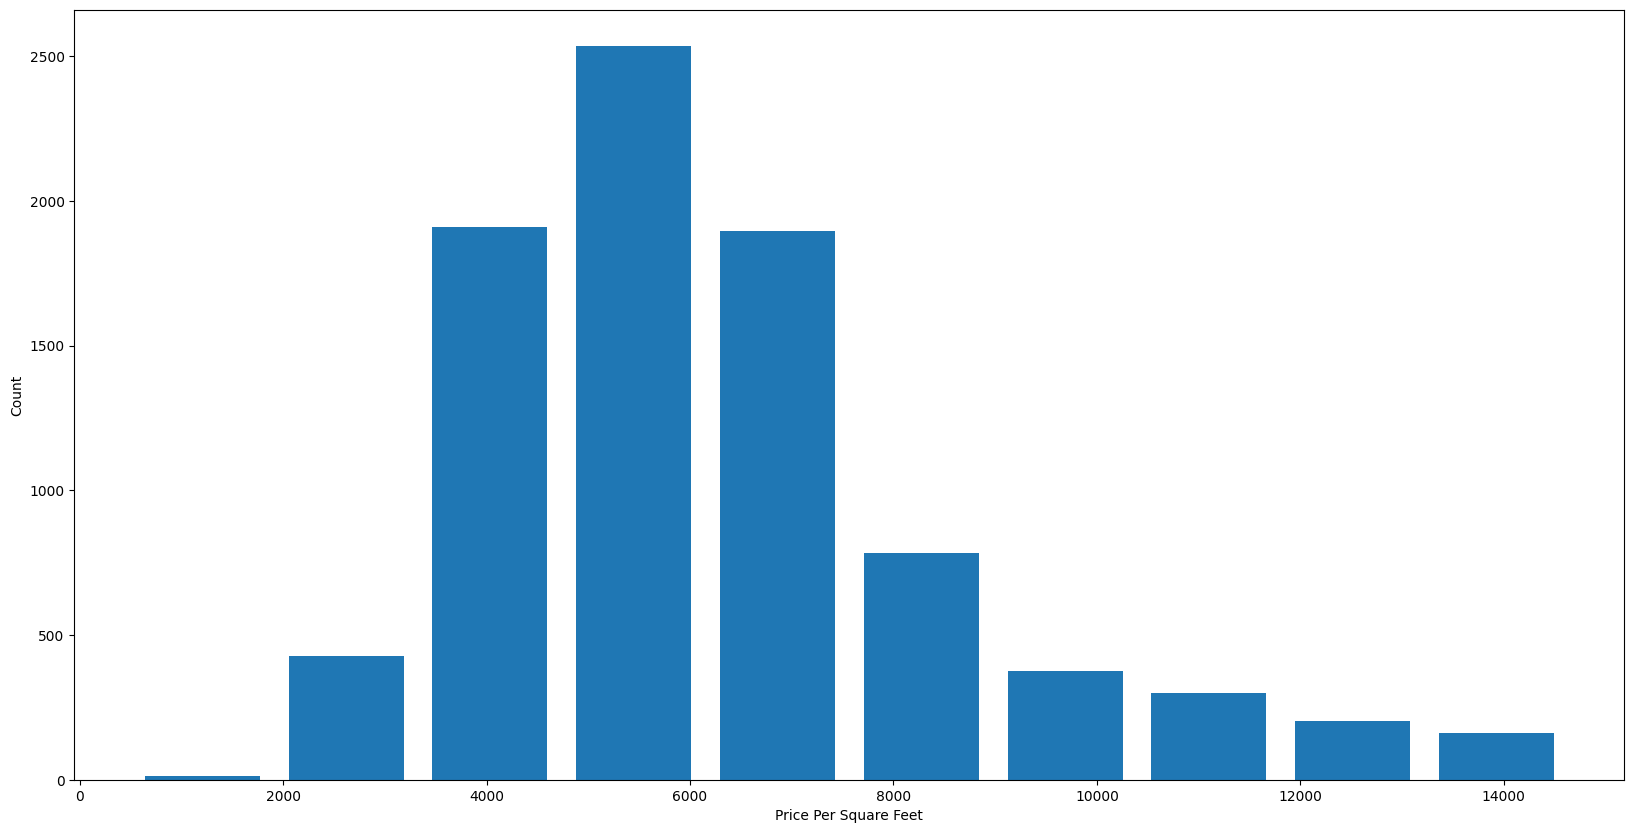

In [126]:

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [127]:
#Outlier Removal Using Bathrooms Feature
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

Text(0, 0.5, 'Count')

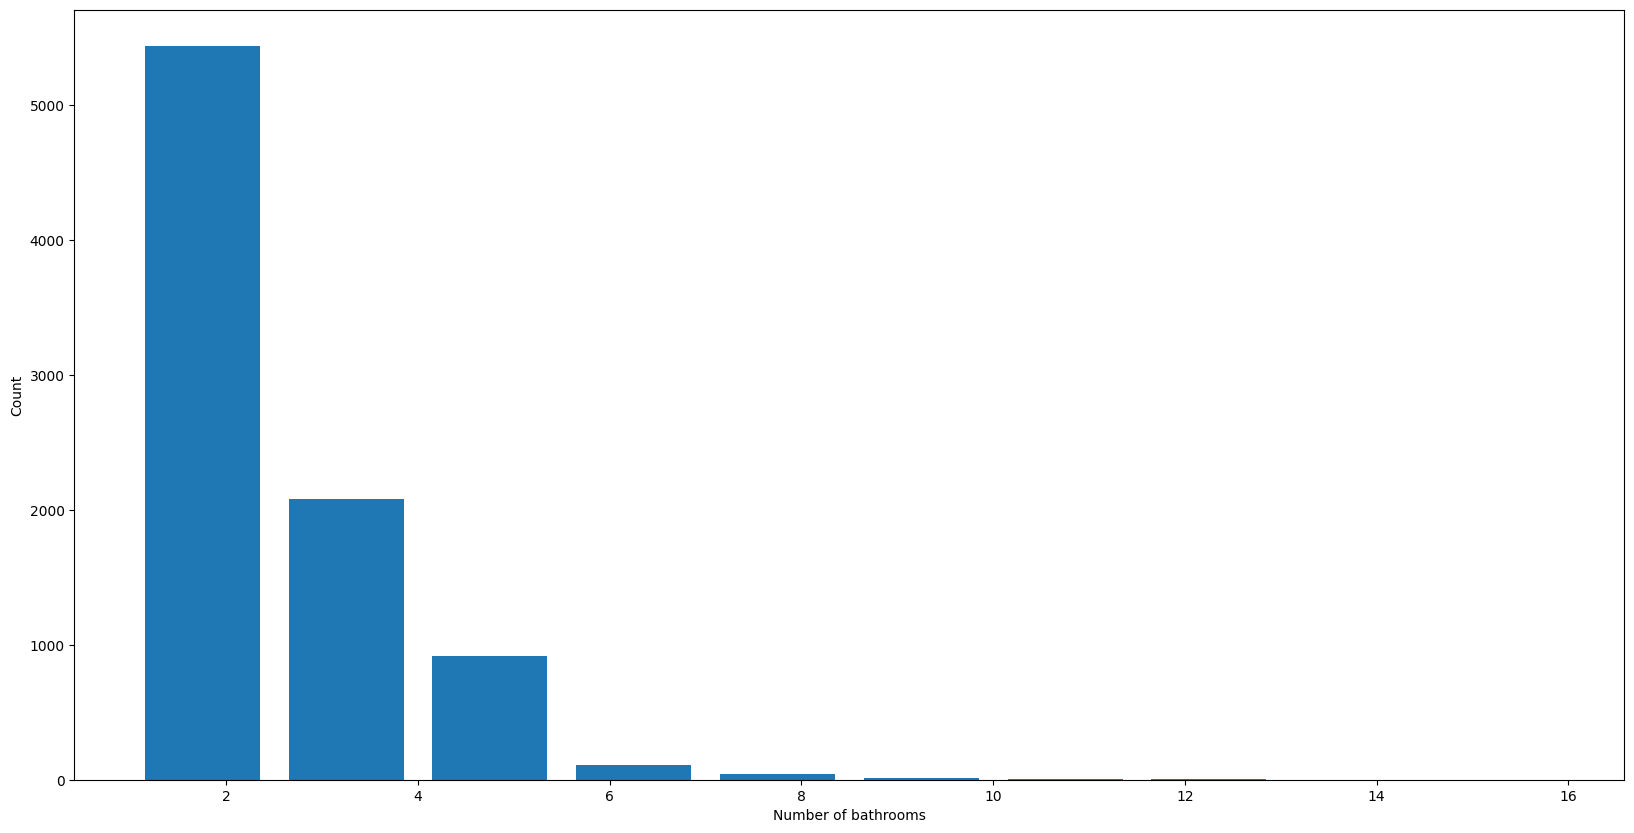

In [128]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [129]:
df8[df8.bath>10] #It is unusual to have 2 more bathrooms than number of bedrooms in a home

,location,total_sqft,bath,price,bhk,price_per_sqft
3096,Other,12000.0,12.0,525.0,10,4375.000000
3609,Other,10000.0,16.0,550.0,16,5500.000000
7979,Other,6000.0,12.0,150.0,11,2500.000000
8636,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
9935,Other,5425.0,13.0,275.0,13,5069.124424


In [130]:
''' Again the business manager has a conversation with you (i.e. a data scientist) that 
if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, 
you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed'''

df9 = df8[df8.bath <= df8.bhk+1]
df9.shape

(8501, 6)

In [131]:
df9.head(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101


In [132]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3


In [133]:
#Use One Hot Encoding For Location(  Prevents machine learning models from misinterpreting categorical data as ordinal.)
dummies = pd.get_dummies(df10.location)  # Create dummy variables for 'location' column into multiple binary (0/1) columns
df11 = pd.concat([df10, dummies], axis='columns')  # Concatenate dummy variables with original dataframe
df11 = df11.drop('location', axis='columns')  # Drop the original 'location' column
print(df11.head())

   total_sqft  bath   price  bhk  1st Block Jayanagar  1st Block Koramangala  \
0      1056.0   2.0   39.07    2                False                  False   
2      1440.0   2.0   62.00    3                False                  False   
3      1521.0   3.0   95.00    3                False                  False   
4      1200.0   2.0   51.00    2                False                  False   
6      2732.0   4.0  204.00    4                False                  False   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   
6               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0      

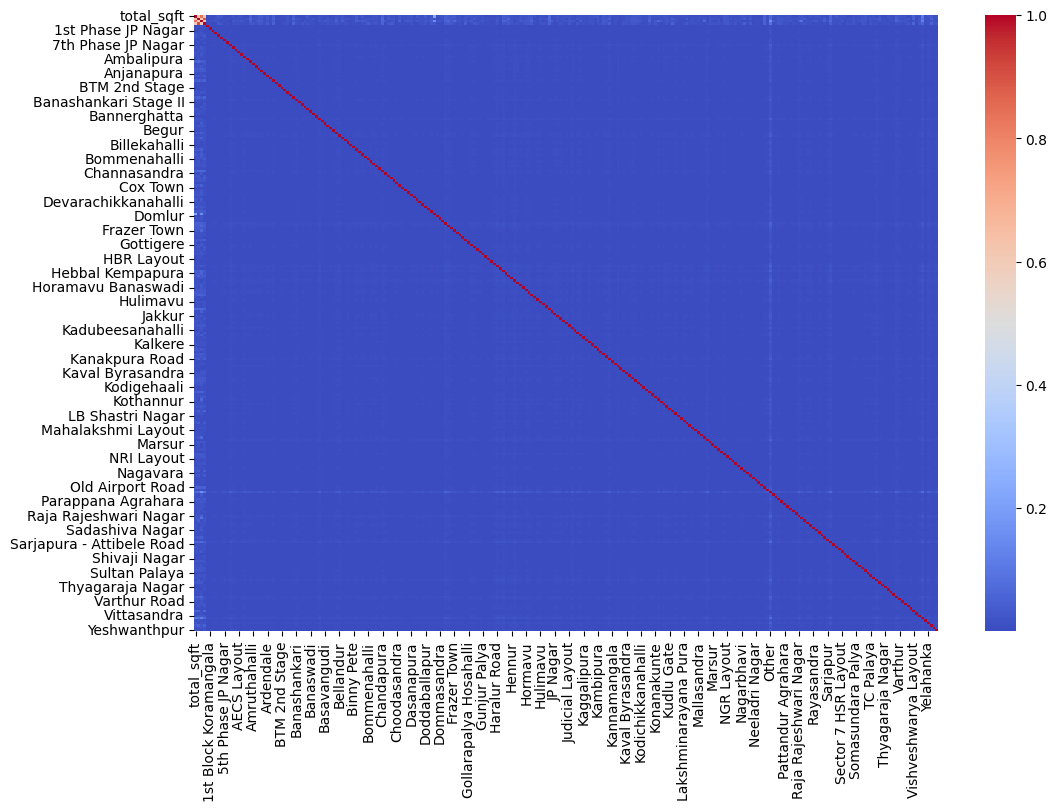

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df11.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

['bhk']


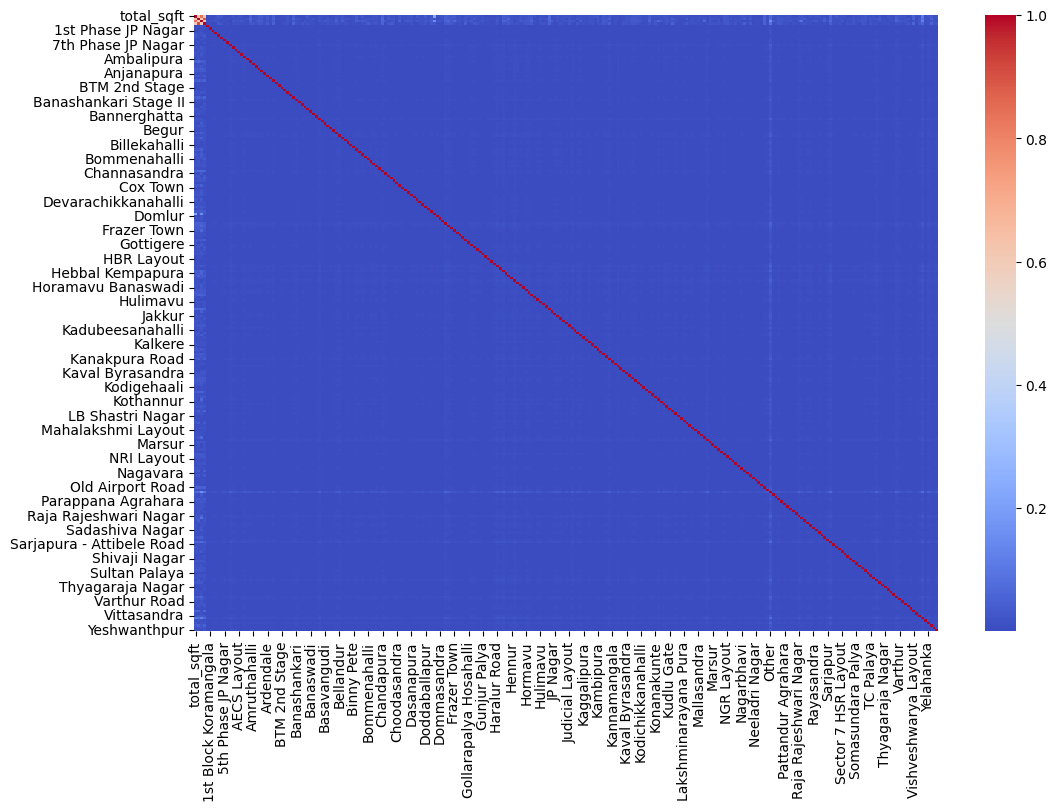

In [135]:
#Remove Highly Correlated Features

# Find pairs with high correlation (threshold = 0.9)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(high_corr_features)

# Drop these features
#df12 = df11.drop(columns=high_corr_features)
#since it dropped  the bhk column i wast checking what will happen if i do not drop it.( result was very bad)
#df12 = df11.copy()
#now i will try to remove bathroom column instead of bhk
df12 = df11.drop(columns="bath")

#Heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.show()

In [136]:
#Build a model now
df12.shape

(8501, 258)

In [137]:
df12.columns

Index(['total_sqft', 'price', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=258)

In [138]:
X = df12.drop(['price'],axis='columns')
X.head(3)
X.shape

(8501, 257)

In [139]:
X.columns

Index(['total_sqft', 'bhk', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [140]:
y = df12.price
y.head(3)

0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

In [141]:
len(y)

8501

In [142]:
# Step 1: Convert bool columns to 0 and 1 (numerical representation)
X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7943487881844356

In [144]:
# #Use K Fold cross validation to measure accuracy of our LinearRegression model
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

# # KFold Cross-Validation with 10 splits
# cv = KFold(n_splits=10, shuffle=True, random_state=0)

# # Perform cross-validation
# scores = cross_val_score(LinearRegression(), X, y, cv=cv)

# # Print the R² scores for each fold
# print("R² scores for each fold:", scores)
# print("Average R² score:", scores.mean())


In [145]:
# from scipy import stats


# # Remove outliers using Z-score method
# z_scores = np.abs(stats.zscore(X))
# X_no_outliers = X[(z_scores < 3).all(axis=1)]
# y_no_outliers = y[(z_scores < 3).all(axis=1)]

# # KFold Cross-Validation with 10 splits
# cv = KFold(n_splits=10, shuffle=True, random_state=0)

# # Perform cross-validation with the cleaned dataset
# scores = cross_val_score(LinearRegression(), X_no_outliers, y_no_outliers, cv=cv)

# # Print the R² scores for each fold
# print("R² scores for each fold:", scores)
# print("Average R² score:", scores.mean())


In [146]:
# X = X_no_outliers.copy()
# y = y_no_outliers.copy()

In [147]:
print(X.shape)  # This should print something like (n_samples, n_features
print(X.columns)


(8501, 257)
Index(['total_sqft', 'bhk', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)


In [148]:
print(X.dtypes)  # For pandas DataFrame
print(type(X))    # To check if it's a DataFrame or NumPy array

total_sqft               float64
bhk                        int64
1st Block Jayanagar        int32
1st Block Koramangala      int32
1st Phase JP Nagar         int32
                          ...   
Yelachenahalli             int32
Yelahanka                  int32
Yelahanka New Town         int32
Yelenahalli                int32
Yeshwanthpur               int32
Length: 257, dtype: object
<class 'pandas.core.frame.DataFrame'>


In [149]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Scale only once

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error'],
                'splitter': ['best'],
                'max_depth': [None, 5, 10],  # Reduced options
                'min_samples_split': [2, 10],  # Reduced options
                'min_samples_leaf': [1, 5],  # Reduced options
                'max_features': [None, 'sqrt'],  # Reduced options
                'max_leaf_nodes': [None, 50]  # Reduced options
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # Reduce CV splits

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, )

        if algo_name == 'linear_regression':
            gs.fit(X_scaled, y)
        else:
            gs.fit(X, y)

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,-11869.783538,{'fit_intercept': False}
1,lasso,0.662619,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.740306,"{'criterion': 'squared_error', 'max_depth': No..."


R² Score: 0.7943


c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


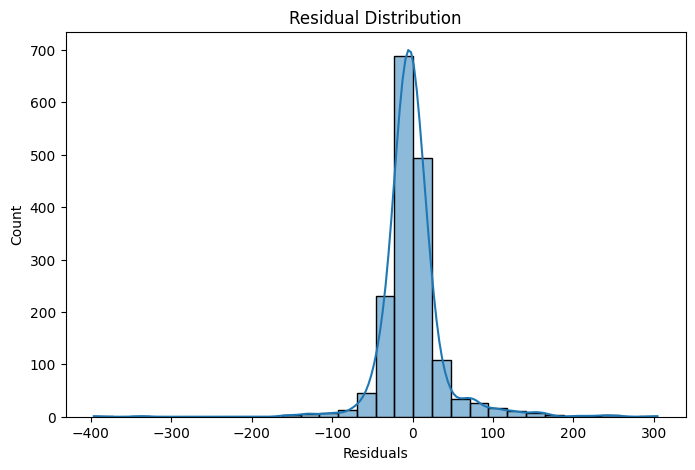

In [150]:

from sklearn.metrics import r2_score

y_pred = lr_clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Square root of MSE

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 23.0524
MSE: 1503.0924
RMSE: 38.7697


In [152]:
#Based on above results we can say that LinearRegression gives the best score. Hence we will use that.
#Test the model for few properties
X.columns

Index(['total_sqft', 'bhk', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [153]:
def predict_price(location, total_sqft, bhk):    
    loc_index = np.where(X.columns == location)[0][0] if location in X.columns else -1

    x = np.zeros(len(X.columns))  # Create a zero array with the same length as feature columns
    x[0] = total_sqft
    x[1] = bhk  # No bath column now
    
    if loc_index >= 0:
        x[loc_index] = 1  # Set location as one-hot encoding

    return lr_clf.predict([x])[0] 

In [154]:
predict_price("1st Phase JP Nagar", 1500, 4)

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


148.396041726534

In [155]:
predict_price('Indira Nagar',1000, 3)

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


150.94935927382073

In [156]:
#NOW I AM USIG DECISON TREEE
# Train Decision Tree model
dt_model = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=10, 
                                 min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
dt_model.fit(X, y)  # Train the model using available data

DecisionTreeRegressor(max_depth=10)

In [157]:
def predict_price_decision_tree(location, sqft, bhk):    
    loc_index = np.where(X.columns == location)[0][0] if location in X.columns else -1

    x = np.zeros(len(X.columns))  # Create feature array
    x[0] = sqft
    x[1] = bhk  # Since 'bath' is removed
    
    if loc_index >= 0:
        x[loc_index] = 1  # One-hot encoding for location

    return dt_model.predict([x])[0]  # Predict price using DecisionTreeRegressor


In [158]:
predict_price_decision_tree('Indira Nagar', 1000, 3)

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


115.71428571428571

In [159]:
predict_price_decision_tree("1st Phase JP Nagar", 1500, 4)

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


148.36354166666666

In [160]:
predict_price_decision_tree('Indira Nagar',1000, 2)

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


47.62108120035305

In [161]:
X["Indira Nagar"].unique()

array([0, 1])